# 物体检测-Faster R-CNN

物体检测是计算机视觉中的一个重要的研究领域，在人流检测，行人跟踪，自动驾驶，医学影像等领域有着广泛的应用。不同于简单的图像分类，物体检测旨在对图像中的目标进行精确识别，包括物体的位置和分类，因此能够应用于更多高层视觉处理的场景。例如在自动驾驶领域，需要辨识摄像头拍摄的图像中的车辆、行人、交通指示牌及其位置，以便进一步根据这些数据决定驾驶策略。上一期学习案例中，我们聚焦于YOLO算法，YOLO(You Only Look Once)是一种one-stage物体检测算法，在本期案例中，我们介绍一种two-stage算法——Faster R-CNN，将目标区域检测和类别识别分为两个任务进行物体检测。

[点击跳转至Faster-RCNN模型简介](https://github.com/huaweicloud/ModelArts-Lab/wiki/Faster-RCNN模型简介)

### 进入ModelArts
点击如下链接：https://www.huaweicloud.com/product/modelarts.html ， 进入ModelArts主页。点击“立即使用”按钮，输入用户名和密码登录，进入ModelArts使用页面

### 创建ModelArts notebook
下面，我们在ModelArts中创建一个notebook开发环境，ModelArts notebook提供网页版的Python开发环境，可以方便的编写、运行代码，并查看运行结果。

第一步：在ModelArts服务主界面依次点击“开发环境”、“创建”
![create_nb_create_button](./img/create_nb_create_button.png)

第二步：填写notebook所需的参数：



|项目|建议填写方式|
|-|-|
|名称|自定义环境名称|
|工作环境 | Python3|
| 资源池 | 选择\"公共资源池\"即可 |
|类型|GPU|
|规格|GPU:1*p100, CPU:8核64GiB|
|存储配置|EVS|
|磁盘规格|5GB|

第三步：配置好notebook参数后，点击下一步，进入notebook信息预览。确认无误后，点击“立即创建“
![create_nb_creation_summary](./img/create_nb_creation_summary.png)

第四步：创建完成后，返回开发环境主界面，等待Notebook创建完毕后，打开Notebook，进行下一步操作
![modelarts_notebook_index](./img/modelarts_notebook_index.png)

### 在ModelArts中创建开发环境
接下来，我们创建一个实际的开发环境，用于后续的实验步骤。

第一步：点击下图所示的“打开”按钮，进入刚刚创建的Notebook,
![inter_dev_env](img/enter_dev_env.png)

第二步：创建一个Python3环境的的Notebook。点击右上角的\"New\"，然后选择**Pytorch**开发环境。

第三步：点击左上方的文件名\"Untitled\"，并输入一个与本实验相关的名称,

### 在Notebook中编写并执行代码
在Notebook中，我们输入一个简单的打印语句，然后点击上方的运行按钮，可以查看语句执行的结果：",
![run_helloworld](./img/run_helloworld.png)

开发环境准备好啦，接下来可以愉快地写代码啦！"


在接下来的部分中，我们对Faster R-CNN进行训练。为了减少训练时间，我们在预训练模型的基础上进行训练。
首先，我们将需要的代码和数据进行下载。

In [1]:
from modelarts.session import Session
sess = Session()

if sess.region_name == 'cn-north-1':
    bucket_path="modelarts-labs/notebook/DL_object_detection_faster/faster.tar"
elif sess.region_name == 'cn-north-4':
    bucket_path="modelarts-labs-bj4/notebook/DL_object_detection_faster/faster.tar"
else:
    print("请更换地区到北京一或北京四")

sess.download_data(bucket_path=bucket_path, path="./faster.tar")

# 解压压缩包
!tar -xf ./faster.tar

# 清理压缩包
!rm -r ./faster.tar

Successfully download file modelarts-labs/notebook/DL_object_detection_faster/faster.tar from OBS to local ./faster.tar


#### 安装与引用

In [2]:
!pip install pycocotools==2.0.0
!pip install torchvision==0.4.0
!pip uninstall -y protobuf
!pip install protobuf==3.9.0

    100% |████████████████████████████████| 1.5MB 113.8MB/s ta 0:00:01                          | 245kB 85.4MB/s eta 0:00:01
  Running setup.py bdist_wheel for pycocotools ... done
  Stored in directory: /home/ma-user/.cache/pip/wheels/94/39/5f/52a87f45927330522a105995b30ee880c64da963c6d879c819
Successfully built pycocotools
You are using pip version 9.0.1, however version 19.2.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
    100% |████████████████████████████████| 8.8MB 87.1MB/s ta 0:00:011    | 2.1MB 87.0MB/s eta 0:00:01MB 94.6MB/s eta 0:00:01


    80% |████████████████

    81% |██████████████████████████      | 609.2MB 92.9MB/s eta 0:00:

    81% |███████████████████

    82% |██████████████████�

    83% |██████████████████████████▋     | 623.6MB 88.4MB/s eta 0:00:02

    84% |██████████████████�

    84% |██████████████████�

    85% |███████████████████

    85% |███████�

    85% |███████████████████████████▌    | 643.0MB 94.2MB/s eta 0:00:02

    86% |███████████████████████████▋    | 64

    86% |███████�

    87% |███████████████████████████▉    | 651.8MB 89.7MB/s eta 0:00:02

    87% |████████████████████████████    | 65

    87% |███████████████████

    88% |�

    89% |██�

    89% |████████████████████████████▉   | 673.5MB 94.4MB/s eta 0:00:01

    90

    90% |�

    91% |████████████████████████

    91% |█████████████████████████████▏  | 683.8MB 93.7MB/s eta 0:00:01

    91% |████████████████████████

    91% |████████████████████████

    92% |█████████████████████████████▌  | 690

    92% |█████████████████████████████▋  | 692.8MB 91.6MB/s eta 0:00:01

    92% |█████████████████████████████▊  | 695

    93% |█████████████████████████████▉  | 697

    93% |██████████████████████████████  | 699.5MB 88.5MB/s eta 0:00:01

    93% |████████████████████████

    93% |██████████████████████████████  | 703

    94% |███████████████████████

    94% |████�

    94% |███████████████████████

    95% |██████████████████████████████▍ | 712.3MB 88.0MB/s eta 0:00:01

    95% |███████████████████████

    95% |██████████████████████████████▊ | 718.3MB 39.6MB/s eta 0:00:01

    96% |██████████████████████████████▉ | 

    96% |████�

    96% |████�

    97% |████�

    97% |█████████████�

    97% |█████████████�

    98% |█████████████�

    98% |███████████████████████████████�

    98% |█████████████�

    98% |███████████████████████████████�

    99% |█████████████�

    99% |███████████████████████████████▉| 746.2MB 89.4MB/s eta 0:00:01

    99% |█████████████�

    100% |████████████████████████████████| 748.9MB 70.3MB/s ta 0:00:011
  Found existing installation: torch 1.0.0
    Uninstalling torch-1.0.0:
      Successfully uninstalled torch-1.0.0
  Found existing installation: torchvision 0.2.1
    Uninstalling torchvision-0.2.1:
      Successfully uninstalled torchvision-0.2.1
You are using pip version 9.0.1, however version 19.2.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Uninstalling protobuf-3.5.1:
  Successfully uninstalled protobuf-3.5.1
You are using pip version 9.0.1, however version 19.2.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
    100% |████████████████████████████████| 1.2MB 36.9MB/s eta 0:00:01�████████████████▏        | 890kB 103.7MB/s eta 0:00:01
You are using pip version 9.0.1, however version 19.2.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
import tools._init_paths

%matplotlib inline
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorboardX as tb
from datasets.factory import get_imdb
from model.train_val import get_training_roidb, train_net
from model.config import cfg, cfg_from_file, cfg_from_list, get_output_dir, get_output_tb_dir

In [4]:
import roi_data_layer.roidb as rdl_roidb
from roi_data_layer.layer import RoIDataLayer
import utils.timer

import pickle

import torch
import torch.optim as optim
from nets.vgg16 import vgg16

import numpy as np
import os
import sys
import glob
import time

#### 模型训练中的参数设置

In [5]:
imdb_name = "voc_2007_trainval"
imdbval_name = "voc_2007_test"
# 使用的预训练模型位置
weight = "./data/imagenet_weights/vgg16.pth"
# 迭代次数
max_iters = 100
# cfg模型文件位置
cfg_file = None
set_cfgs = None

#### 定义加载数据集函数

In [6]:
def combined_roidb(imdb_names):
    
    def get_roidb(imdb_name):
        # 加载数据集
        imdb = get_imdb(imdb_name)
        print('Loaded dataset `{:s}` for training'.format(imdb.name))
        # 使用ground truth作为数据集策略
        imdb.set_proposal_method(cfg.TRAIN.PROPOSAL_METHOD)
        print('Set proposal method: {:s}'.format(cfg.TRAIN.PROPOSAL_METHOD))
        roidb = get_training_roidb(imdb)
        return roidb

    roidbs = [get_roidb(s) for s in imdb_names.split('+')]
    roidb = roidbs[0]
    if len(roidbs) > 1:
        for r in roidbs[1:]:
            roidb.extend(r)
        tmp = get_imdb(imdb_names.split('+')[1])
        imdb = datasets.imdb.imdb(imdb_names, tmp.classes)
    else:
        imdb = get_imdb(imdb_names)
    return imdb, roidb

#### 训练过程

In [7]:
if cfg_file is not None:
    cfg_from_file(cfg_file)
if set_cfgs is not None:
    cfg_from_list(set_cfgs)

print('Using config:')
print(cfg)

np.random.seed(cfg.RNG_SEED)

# 加载训练数据集
imdb, roidb = combined_roidb(imdb_name)
print('{:d} roidb entries'.format(len(roidb)))

# 设置输出路径
output_dir = get_output_dir(imdb,None)
print('Output will be saved to `{:s}`'.format(output_dir))

# 设置日志保存路径
tb_dir = get_output_tb_dir(imdb, None)
print('TensorFlow summaries will be saved to `{:s}`'.format(tb_dir))

# 加载验证数据集
orgflip = cfg.TRAIN.USE_FLIPPED
cfg.TRAIN.USE_FLIPPED = False
_, valroidb = combined_roidb(imdbval_name)
print('{:d} validation roidb entries'.format(len(valroidb)))
cfg.TRAIN.USE_FLIPPED = orgflip

# 创建backbone网络
# 在案例中使用的是VGG16模型，可以尝试其他不同的模型结构，例如Resnet等
net = vgg16()


Using config:
{'TRAIN': {'LEARNING_RATE': 0.001, 'MOMENTUM': 0.9, 'WEIGHT_DECAY': 0.0001, 'GAMMA': 0.1, 'STEPSIZE': [30000], 'DISPLAY': 10, 'DOUBLE_BIAS': True, 'TRUNCATED': False, 'BIAS_DECAY': False, 'USE_GT': False, 'ASPECT_GROUPING': False, 'SNAPSHOT_KEPT': 3, 'SUMMARY_INTERVAL': 180, 'SCALES': [600], 'MAX_SIZE': 1000, 'IMS_PER_BATCH': 1, 'BATCH_SIZE': 128, 'FG_FRACTION': 0.25, 'FG_THRESH': 0.5, 'BG_THRESH_HI': 0.5, 'BG_THRESH_LO': 0.1, 'USE_FLIPPED': True, 'BBOX_REG': True, 'BBOX_THRESH': 0.5, 'SNAPSHOT_ITERS': 5000, 'SNAPSHOT_PREFIX': 'res101_faster_rcnn', 'BBOX_NORMALIZE_TARGETS': True, 'BBOX_INSIDE_WEIGHTS': [1.0, 1.0, 1.0, 1.0], 'BBOX_NORMALIZE_TARGETS_PRECOMPUTED': True, 'BBOX_NORMALIZE_MEANS': [0.0, 0.0, 0.0, 0.0], 'BBOX_NORMALIZE_STDS': [0.1, 0.1, 0.2, 0.2], 'PROPOSAL_METHOD': 'gt', 'HAS_RPN': True, 'RPN_POSITIVE_OVERLAP': 0.7, 'RPN_NEGATIVE_OVERLAP': 0.3, 'RPN_CLOBBER_POSITIVES': False, 'RPN_FG_FRACTION': 0.5, 'RPN_BATCHSIZE': 256, 'RPN_NMS_THRESH': 0.7, 'RPN_PRE_NMS_TOP_N

In [8]:
from model.train_val import filter_roidb, SolverWrapper
# 对ROI进行筛选，将无效的ROI数据筛选掉
roidb = filter_roidb(roidb)
valroidb = filter_roidb(valroidb)

sw = SolverWrapper(
    net,
    imdb,
    roidb,
    valroidb,
    output_dir,
    tb_dir,
    pretrained_model=weight)

print('Solving...')

Filtered 0 roidb entries: 10022 -> 10022
Filtered 0 roidb entries: 4952 -> 4952
Solving...


In [9]:
# 显示所有模型属性
sw.__dict__.keys()

dict_keys(['net', 'imdb', 'roidb', 'valroidb', 'output_dir', 'tbdir', 'tbvaldir', 'pretrained_model'])

In [10]:
# 此时的sw.net为backbone
print(sw.net)

vgg16()


In [11]:
# 构建网络结构，模型加入ROI数据层
sw.data_layer = RoIDataLayer(sw.roidb, sw.imdb.num_classes)
sw.data_layer_val = RoIDataLayer(sw.valroidb, sw.imdb.num_classes, random=True)

# 构建网络结构，在VGG16基础上加入ROI和Classifier部分
lr, train_op = sw.construct_graph()

# 加载之前的snapshot
lsf, nfiles, sfiles = sw.find_previous()

# snapshot 为训练提供了断点训练，如果有snapshot将加载进来，继续训练
if lsf == 0:
    lr, last_snapshot_iter, stepsizes, np_paths, ss_paths = sw.initialize(
    )
else:
    lr, last_snapshot_iter, stepsizes, np_paths, ss_paths = sw.restore(
        str(sfiles[-1]), str(nfiles[-1]))
iter = last_snapshot_iter + 1
last_summary_time = time.time()
# 在之前的训练基础上继续进行训练
stepsizes.append(max_iters)
stepsizes.reverse()
next_stepsize = stepsizes.pop()
# 对net切换成训练模式
print("网络结构")
sw.net.train()
sw.net.to(sw.net._device)

Loading initial model weights from ./data/imagenet_weights/vgg16.pth
Loaded.
网络结构


vgg16(
  (vgg): VGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=True)
      (16): MaxP

In [12]:
# 开始训练

while iter < max_iters + 1:
    cfg.SNAPSHOT_PREFIX = "VGG_faster_rcnn"
    if iter == next_stepsize + 1:
        # 加入snapshot节点
        sw.snapshot(iter)
        lr *= cfg.TRAIN.GAMMA
        scale_lr(sw.optimizer, cfg.TRAIN.GAMMA)
        next_stepsize = stepsizes.pop()

    utils.timer.timer.tic()
    # 数据通过ROI数据层，进行前向计算
    blobs = sw.data_layer.forward()

    now = time.time()
    if iter == 1 or now - last_summary_time > cfg.TRAIN.SUMMARY_INTERVAL:
        # 计算loss函数
        # 根据loss函数对模型进行训练
        rpn_loss_cls, rpn_loss_box, loss_cls, loss_box, total_loss, summary = \
          sw.net.train_step_with_summary(blobs, sw.optimizer)
        for _sum in summary:
            sw.writer.add_summary(_sum, float(iter))
        # 进行数据层验证计算
        blobs_val = sw.data_layer_val.forward()
        summary_val = sw.net.get_summary(blobs_val)
        for _sum in summary_val:
            sw.valwriter.add_summary(_sum, float(iter))
        last_summary_time = now
    else:
        rpn_loss_cls, rpn_loss_box, loss_cls, loss_box, total_loss = \
          sw.net.train_step(blobs, sw.optimizer)
    utils.timer.timer.toc()

    if iter % (cfg.TRAIN.DISPLAY) == 0:
        print('iter: %d / %d, total loss: %.6f\n >>> rpn_loss_cls: %.6f\n '
              '>>> rpn_loss_box: %.6f\n >>> loss_cls: %.6f\n >>> loss_box: %.6f\n >>> lr: %f' % \
              (iter, max_iters, total_loss, rpn_loss_cls, rpn_loss_box, loss_cls, loss_box, lr))
        print('speed: {:.3f}s / iter'.format(
            utils.timer.timer.average_time()))

    # 进行snapshot存储
    if iter % cfg.TRAIN.SNAPSHOT_ITERS == 0:
        last_snapshot_iter = iter
        ss_path, np_path = sw.snapshot(iter)
        np_paths.append(np_path)
        ss_paths.append(ss_path)

        # 删掉多余的snapshot
        if len(np_paths) > cfg.TRAIN.SNAPSHOT_KEPT:
            sw.remove_snapshot(np_paths, ss_paths)

    iter += 1

if last_snapshot_iter != iter - 1:
    sw.snapshot(iter - 1)

sw.writer.close()
sw.valwriter.close()

iter: 10 / 100, total loss: 0.988409
 >>> rpn_loss_cls: 0.411707
 >>> rpn_loss_box: 0.005195
 >>> loss_cls: 0.357310
 >>> loss_box: 0.214197
 >>> lr: 0.001000
speed: 0.665s / iter
iter: 20 / 100, total loss: 2.045555
 >>> rpn_loss_cls: 0.341815
 >>> rpn_loss_box: 0.085491
 >>> loss_cls: 0.972127
 >>> loss_box: 0.646122
 >>> lr: 0.001000
speed: 0.394s / iter
iter: 30 / 100, total loss: 1.358216
 >>> rpn_loss_cls: 0.133233
 >>> rpn_loss_box: 0.048956
 >>> loss_cls: 0.726890
 >>> loss_box: 0.449138
 >>> lr: 0.001000
speed: 0.304s / iter
iter: 40 / 100, total loss: 0.670349
 >>> rpn_loss_cls: 0.588077
 >>> rpn_loss_box: 0.068043
 >>> loss_cls: 0.014229
 >>> loss_box: 0.000000
 >>> lr: 0.001000
speed: 0.258s / iter
iter: 50 / 100, total loss: 0.935002
 >>> rpn_loss_cls: 0.287713
 >>> rpn_loss_box: 0.068464
 >>> loss_cls: 0.409374
 >>> loss_box: 0.169451
 >>> lr: 0.001000
speed: 0.231s / iter
iter: 60 / 100, total loss: 0.481701
 >>> rpn_loss_cls: 0.303953
 >>> rpn_loss_box: 0.058025
 >>> lo

### 测试部分
在这部分中，我们利用在训练后得到的模型进行推理测试。在上一个案例中，我们使用Faster R-CNN进行了模型的训练，在这里我们通过


In [13]:
%matplotlib inline
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
# 将路径转入lib
import tools._init_paths

from model.config import cfg
from model.test import im_detect
from torchvision.ops import nms

from utils.timer import Timer
import matplotlib.pyplot as plt
import numpy as np
import os, cv2
import argparse

from nets.vgg16 import vgg16
from nets.resnet_v1 import resnetv1
from model.bbox_transform import clip_boxes, bbox_transform_inv

import torch


#### 参数定义

In [14]:
# PASCAL VOC类别设置
CLASSES = ('__background__',
           'aeroplane', 'bicycle', 'bird', 'boat',
           'bottle', 'bus', 'car', 'cat', 'chair',
           'cow', 'diningtable', 'dog', 'horse',
           'motorbike', 'person', 'pottedplant',
           'sheep', 'sofa', 'train', 'tvmonitor')
# 网络模型文件名定义
NETS = {'vgg16': ('vgg16_faster_rcnn_iter_%d.pth',),'res101': ('res101_faster_rcnn_iter_%d.pth',)}
# 数据集文件名定义
DATASETS= {'pascal_voc': ('voc_2007_trainval',),'pascal_voc_0712': ('voc_2007_trainval+voc_2012_trainval',)}

#### 结果绘制函数

In [15]:
def vis_detections(im, class_dets, thresh=0.5):
    """Draw detected bounding boxes."""
    im = im[:, :, (2, 1, 0)]
    fig, ax = plt.subplots(figsize=(12, 12))
    ax.imshow(im, aspect='equal')
    for class_name in class_dets:
        dets = class_dets[class_name]
        inds = np.where(dets[:, -1] >= thresh)[0]
        if len(inds) == 0:
            continue
        
        for i in inds:
            bbox = dets[i, :4]
            score = dets[i, -1]

            ax.add_patch(
                plt.Rectangle((bbox[0], bbox[1]),
                              bbox[2] - bbox[0],
                              bbox[3] - bbox[1], fill=False,
                              edgecolor='red', linewidth=3.5)
                )
            ax.text(bbox[0], bbox[1] - 2,
                    '{:s} {:.3f}'.format(class_name, score),
                    bbox=dict(facecolor='blue', alpha=0.5),
                    fontsize=14, color='white')

        plt.axis('off')
        plt.tight_layout()
        plt.draw()


我们将测试图片传到**test**文件夹下，我们准备了两张图片进行测试，大家也可以通过notebook的upload按钮上传自己的测试数据。注意，测试数据需要是图片，并且放在**test**文件夹下。

In [16]:
from modelarts.session import Session
sess = Session()
sess.download_data(bucket_path="/modelarts-labs/notebook/DL_object_detection_faster/test_image.tar", path="./test_image.tar")
!tar -xf ./test_image.tar

Successfully download file modelarts-labs/notebook/DL_object_detection_faster/test_image.tar from OBS to local ./test_image.tar


In [17]:
demonet = 'vgg16' 
dataset = 'pascal_voc_0712' 
im_file = "./tools/test.jpg"
im_file = "./test"

trying to load weights from ./models/vgg16-voc0712/vgg16_faster_rcnn_iter_110000.pth
Loaded network ./models/vgg16-voc0712/vgg16_faster_rcnn_iter_110000.pth
./test/test_image_1.jpg
(300, 21) (300, 84)
Detection took 0.054s for 300 object proposals


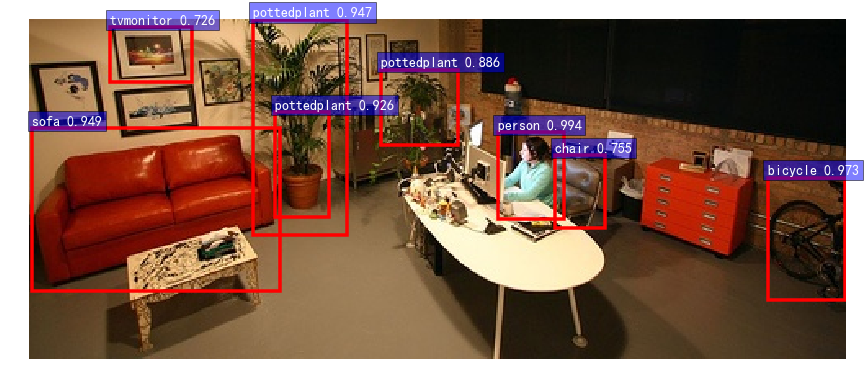

./test/test_image_0.jpg
(300, 21) (300, 84)
Detection took 0.059s for 300 object proposals


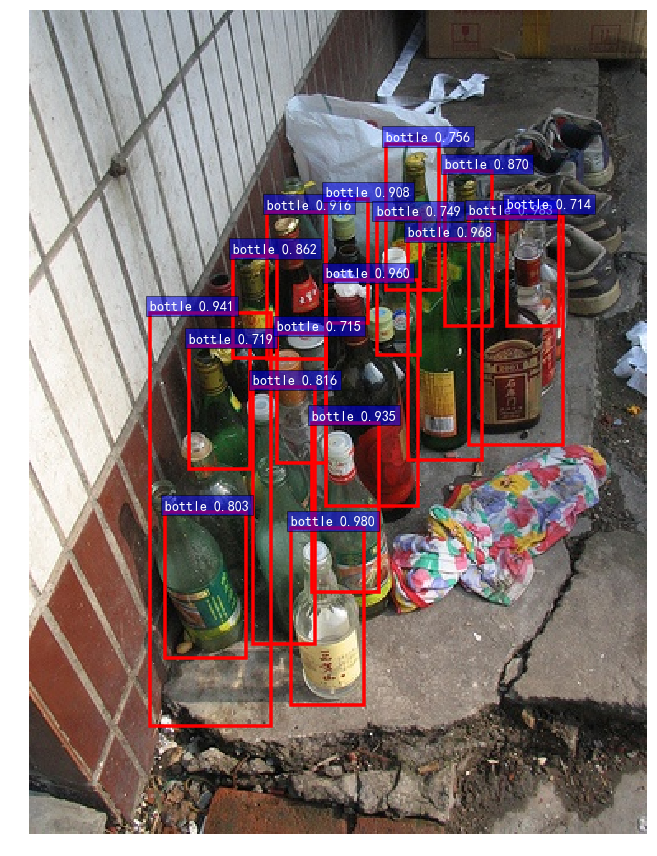

In [18]:
import cv2
from utils.timer import Timer
from model.test import im_detect
from torchvision.ops import nms

cfg.TEST.HAS_RPN = True  # Use RPN for proposals

# 模型存储位置
# 这里我们加载一个已经训练110000迭代之后的模型，可以选择自己的训练模型位置
saved_model = "./models/vgg16-voc0712/vgg16_faster_rcnn_iter_110000.pth"
print('trying to load weights from', saved_model)


# 加载backbone
net = vgg16()
# 构建网络
net.create_architecture(21, tag='default', anchor_scales=[8, 16, 32])
# 加载权重文件
net.load_state_dict(torch.load(saved_model, map_location=lambda storage, loc: storage))

net.eval()
# 选择计算设施
net.to(net._device)

print('Loaded network {:s}'.format(saved_model))

for file in os.listdir(im_file):
    if file.startswith("._") == False:
        file_path = os.path.join(im_file,file)
        print(file_path)
        # 打开测试图片文件
        im = cv2.imread(file_path)

        # 定义计时器
        timer = Timer()
        timer.tic()
        # 预测图片ROI
        scores, boxes = im_detect(net, im)

        print(scores.shape, boxes.shape)
        timer.toc()
        print('Detection took {:.3f}s for {:d} object proposals'.format(timer.total_time(), boxes.shape[0]))

        # Visualize detections for each class
        CONF_THRESH = 0.7
        NMS_THRESH = 0.3

        cls_dets = {}

        # NMS 非极大值抑制操作
        for cls_ind, cls in enumerate(CLASSES[1:]):
            cls_ind += 1 # because we skipped background
            cls_boxes = boxes[:, 4*cls_ind:4*(cls_ind + 1)]
            cls_scores = scores[:, cls_ind]
            dets = np.hstack((cls_boxes,
                              cls_scores[:, np.newaxis])).astype(np.float32)
            keep = nms(torch.from_numpy(cls_boxes), torch.from_numpy(cls_scores), NMS_THRESH)
            dets = dets[keep.numpy(), :]

            if len(dets) > 0:
                if cls in cls_dets:
                    cls_dets[cls] = np.vstack([cls_dets[cls], dets]) 
                else:
                    cls_dets[cls] = dets
        vis_detections(im, cls_dets, thresh=CONF_THRESH)

        plt.show()
